In [ ]:
## library imports here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from plotnine import ggplot, aes, geom_tile, labs, scale_fill_gradient, theme_minimal, element_text

In [37]:
cannabis = pd.read_csv("/Users/williamkapner/Downloads/cannabis_full.csv")
cannabis.dropna(inplace=True)
cannabis.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part 1: Binary Classification

In [38]:
cannabis_filter = cannabis[(cannabis['Type']== "sativa") | (cannabis['Type']== "indica")]
cannabis_filter.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## LDA

In [62]:
from sklearn.preprocessing import LabelEncoder

X = cannabis_filter.drop(columns=['Type','Strain'])
y = cannabis_filter['Type']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [63]:
import warnings
warnings.filterwarnings("ignore")

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lda', LinearDiscriminantAnalysis())  # LDA model
])

# Define parameter grid
param_grid = {
    'lda__solver': ['svd', 'lsqr', 'eigen'],  # Solvers to test
    'lda__shrinkage': [None, 'auto'],  # Shrinkage (only used with 'lsqr' and 'eigen')
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the final model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'lda__shrinkage': 'auto', 'lda__solver': 'lsqr'}
Best Cross-Validated Accuracy: 0.8526890380313199
Confusion Matrix:
 [[187  11]
 [ 21 102]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.90      0.94      0.92       198
      sativa       0.90      0.83      0.86       123

    accuracy                           0.90       321
   macro avg       0.90      0.89      0.89       321
weighted avg       0.90      0.90      0.90       321



## QDA

In [64]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="Variables are collinear")


pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('qda', QuadraticDiscriminantAnalysis())  # QDA model
])

# Define parameter grid
param_grid = {
    'qda__reg_param': [0.0, 0.1, 0.2, 0.5, 1.0],  # Regularization parameters
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the final model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.1

Best Parameters: {'qda__reg_param': 0.0}
Best Cross-Validated Accuracy: 0.5289395973154363
Confusion Matrix:
 [[ 11 187]
 [  5 118]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.69      0.06      0.10       198
      sativa       0.39      0.96      0.55       123

    accuracy                           0.40       321
   macro avg       0.54      0.51      0.33       321
weighted avg       0.57      0.40      0.27       321



## SVC 

In [65]:
from sklearn.svm import LinearSVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('linsvc', LinearSVC())  # Linear Support Vector Classifier
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'linsvc__C': [0.1, 1, 10],  # Regularization parameter
    'linsvc__max_iter': [1000, 5000],  # Maximum number of iterations
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and best cross-validated score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the final model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/

Best Parameters: {'linsvc__C': 1, 'linsvc__max_iter': 1000}
Best Cross-Validated Accuracy: 0.8419686800894854
Confusion Matrix:
 [[181  17]
 [ 34  89]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.91      0.88       198
      sativa       0.84      0.72      0.78       123

    accuracy                           0.84       321
   macro avg       0.84      0.82      0.83       321
weighted avg       0.84      0.84      0.84       321



## SVM

In [66]:
#SVM
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svc', SVC())  # Support Vector Classifier
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'svc__kernel': ['poly'],  # Polynomial kernel
    'svc__degree': [2, 3, 4],  # Degree of polynomial
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and best cross-validated score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate the final model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'svc__C': 10, 'svc__degree': 2, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
Best Cross-Validated F1 Macro: 0.6385413870246085
Confusion Matrix:
 [[195   3]
 [115   8]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.63      0.98      0.77       198
      sativa       0.73      0.07      0.12       123

    accuracy                           0.63       321
   macro avg       0.68      0.52      0.44       321
weighted avg       0.67      0.63      0.52       321



# Part 2: Natural Multiclass

## Q1

In [70]:
X = cannabis.drop(columns=["Strain", "Type"])
y = cannabis["Type"]

X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Best Decision Tree Parameters: {'dt__max_depth': 3, 'dt__min_samples_split': 2}
Cross-validated Accuracy: 0.6340550552468545


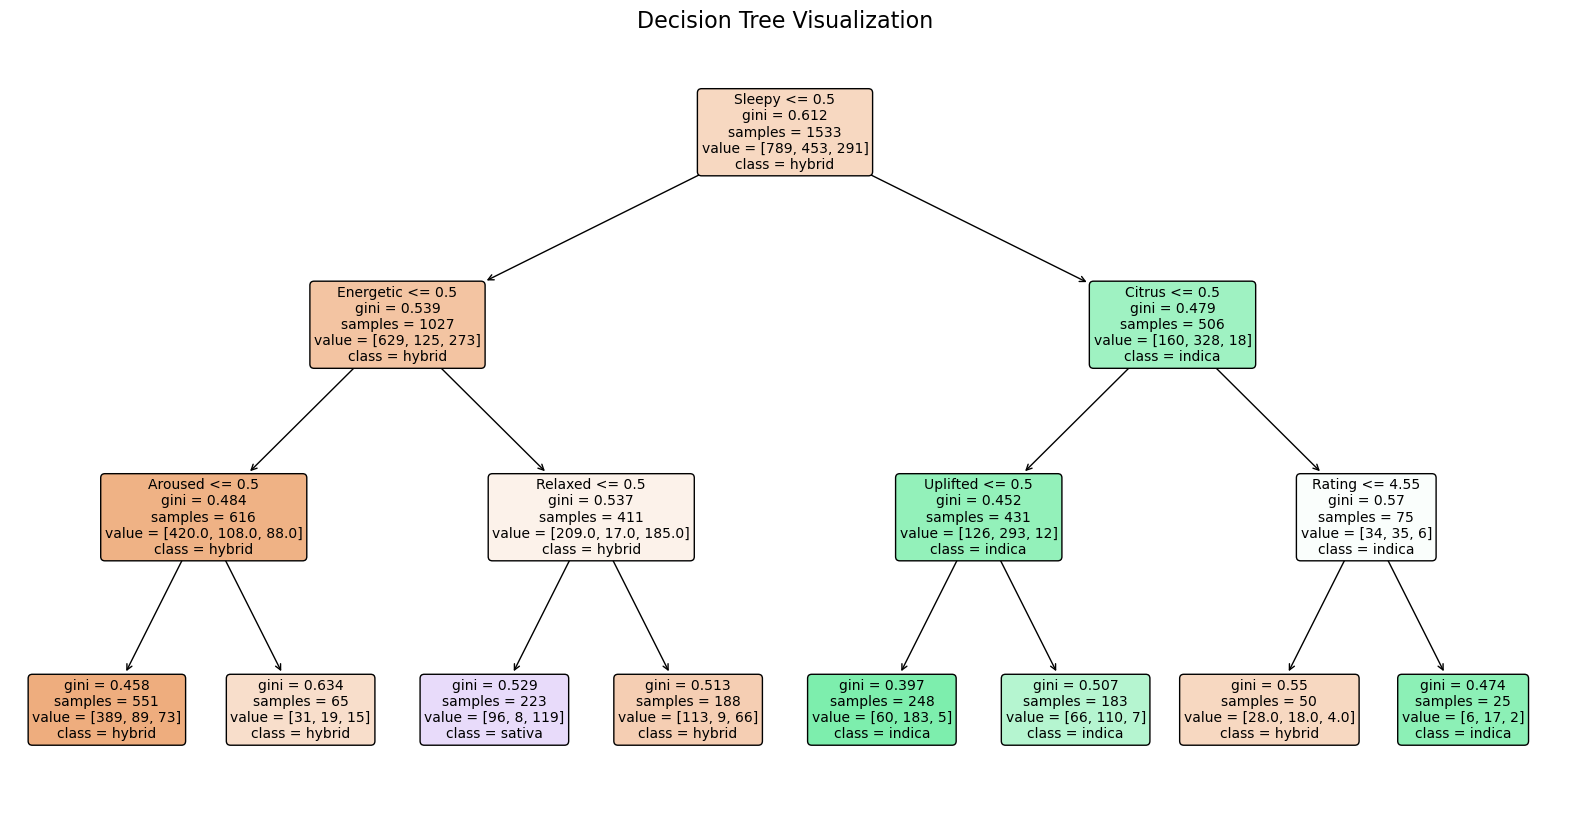

        hybrid  indica  sativa
hybrid     235      63      36
indica      85     119       2
sativa      61       9      48


In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


dt_pipeline = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])
param_grid_dt = {"dt__max_depth": [3, 5, 10, None], "dt__min_samples_split": [2, 5, 10]}
dt_grid = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring="accuracy")
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Cross-validated Accuracy:", dt_grid.best_score_)
dt_cm = confusion_matrix(y_test, best_dt.predict(X_test), labels=best_dt.named_steps["dt"].classes_)



# Extract the decision tree model from the pipeline
decision_tree = best_dt.named_steps["dt"]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    feature_names=X.columns,  # Use feature names from your dataset
    class_names=label_encoder.classes_,  # Use class names from LabelEncoder
    filled=True,  # Color nodes based on class
    rounded=True,  # Round edges of boxes
    fontsize=10,  # Font size for labels
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

cm_df = pd.DataFrame(
    dt_cm,
    index=label_encoder.classes_,  # Actual class labels
    columns=label_encoder.classes_  # Predicted class labels
)
print(cm_df)

The Decision Tree had a 63% accuracy rate in determining which type of cannabis the subject used. The most important decider was if the subject was sleepy or not. There were a total of 3 splits in the tree.

## Q2

### LDA

In [59]:
lda_pipeline = Pipeline([("lda", LinearDiscriminantAnalysis())])
lda_pipeline.fit(X_train, y_train)
lda_scores = cross_val_score(lda_pipeline, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy (LDA):", lda_scores.mean())
lda_cm = confusion_matrix(y_test, lda_pipeline.predict(X_test), labels=lda_pipeline.named_steps["lda"].classes_)
cm_df = pd.DataFrame(
    lda_cm,
    index=label_encoder.classes_,  # Actual class labels
    columns=label_encoder.classes_  # Predicted class labels
)
print(cm_df)

Cross-validated Accuracy (LDA): 0.5081646122075323
        hybrid  indica  sativa
hybrid     249      56      29
indica     109      93       4
sativa      85      10      23


### QDA

In [60]:
qda_pipeline = Pipeline([("qda", QuadraticDiscriminantAnalysis())])
qda_pipeline.fit(X_train, y_train)
qda_scores = cross_val_score(qda_pipeline, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validated Accuracy (QDA):", qda_scores.mean())
qda_cm = confusion_matrix(y_test, qda_pipeline.predict(X_test), labels=qda_pipeline.named_steps["qda"].classes_)
cm_df = pd.DataFrame(
    qda_cm,
    index=label_encoder.classes_,  # Actual class labels
    columns=label_encoder.classes_  # Predicted class labels
)
print(cm_df)

Cross-validated Accuracy (QDA): 0.45013731877115665
        hybrid  indica  sativa
hybrid     122       7     205
indica     116      13      77
sativa      39       0      79


### KNN

In [61]:
knn_pipeline = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
param_grid_knn = {"knn__n_neighbors": [3, 5, 7, 10], "knn__weights": ["uniform", "distance"]}
knn_grid = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)
print("Cross-validated Accuracy (KNN):", knn_grid.best_score_)
knn_cm = confusion_matrix(y_test, best_knn.predict(X_test), labels=best_knn.named_steps["knn"].classes_)
cm_df = pd.DataFrame(
    knn_cm,
    index=label_encoder.classes_,  # Actual class labels
    columns=label_encoder.classes_  # Predicted class labels
)
print(cm_df)

Best KNN Parameters: {'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Cross-validated Accuracy (KNN): 0.40435587915948135
        hybrid  indica  sativa
hybrid      77     251       6
indica      23     182       1
sativa      28      86       4


## Q3

The accuracy for classifying hybrid as well as indica and sativa was far worse than the accuracy in part 1. There doesn't appear to be a specific trend where a specific type of cannabis is misclassified more than another. It seems that adding a hybrid category muddied the waters more and caused more indica or sativa strands to be classified as hybrids and vice versa. Therefore, it makes sense that the accuracy rates are lower because there is a smaller difference between categories.

# Part 3: Multiclass from Binary

## Q1

In [ ]:
## Logistic Regression
# Define categories for OvR (One-vs-Rest)
categories = label_encoder.classes_

# Loop through each category and create OvR models
for category in categories:
    # Create binary target for this category: 1 if the category, 0 otherwise
    y_train_ovr = (y_train == label_encoder.transform([category])[0]).astype(int)
    y_test_ovr = (y_test == label_encoder.transform([category])[0]).astype(int)

    # Ensure that both classes (0 and 1) are present in the training data
    if len(set(y_train_ovr)) > 1:  # Check if both 0 and 1 are in the training data
        # Logistic Regression OvR Model
        logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
        logreg_pipeline.fit(X_train, y_train_ovr)
        y_pred_logreg = logreg_pipeline.predict(X_test)

        # Print the classification report for this category
        print(f"Classification Report for {category} vs. Not {category} (OvR):")
        print(classification_report(y_test_ovr, y_pred_logreg))

Classification Report for hybrid vs. Not hybrid (OvR):
              precision    recall  f1-score   support

           0       0.64      0.56      0.59       324
           1       0.62      0.69      0.65       334

    accuracy                           0.62       658
   macro avg       0.63      0.62      0.62       658
weighted avg       0.63      0.62      0.62       658

Classification Report for indica vs. Not indica (OvR):
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       452
           1       0.70      0.58      0.64       206

    accuracy                           0.79       658
   macro avg       0.76      0.73      0.75       658
weighted avg       0.79      0.79      0.79       658

Classification Report for sativa vs. Not sativa (OvR):
              precision    recall  f1-score   support

           0       0.87      0.93      0.89       540
           1       0.50      0.34      0.40       118

    accuracy     

In [ ]:
## SVC
for category in categories:
    # Create binary target for this category: 1 if the category, 0 otherwise
    y_train_ovr = (y_train == label_encoder.transform([category])[0]).astype(int)
    y_test_ovr = (y_test == label_encoder.transform([category])[0]).astype(int)

    # Ensure that both classes (0 and 1) are present in the training data
    if len(set(y_train_ovr)) > 1:  # Check if both 0 and 1 are in the training data
        
        svc_pipeline = Pipeline([("svc", SVC(random_state=42, probability=True))])
        svc_pipeline.fit(X_train, y_train_ovr)
        y_pred_svc = svc_pipeline.predict(X_test)
        classification_report(y_test_ovr, y_pred_svc, output_dict=True)

        # Print the classification report for this category
        print(f"Classification Report for {category} vs. Not {category} (OvR):")
        print(classification_report(y_test_ovr, y_pred_logreg))

Classification Report for hybrid vs. Not hybrid (OvR):
              precision    recall  f1-score   support

           0       0.49      0.87      0.63       324
           1       0.49      0.12      0.19       334

    accuracy                           0.49       658
   macro avg       0.49      0.50      0.41       658
weighted avg       0.49      0.49      0.40       658

Classification Report for indica vs. Not indica (OvR):
              precision    recall  f1-score   support

           0       0.65      0.83      0.72       452
           1       0.01      0.00      0.01       206

    accuracy                           0.57       658
   macro avg       0.33      0.42      0.37       658
weighted avg       0.45      0.57      0.50       658

Classification Report for sativa vs. Not sativa (OvR):
              precision    recall  f1-score   support

           0       0.87      0.93      0.89       540
           1       0.50      0.34      0.40       118

    accuracy     

Overall, the Logistic Regression had better accuracy than the SVC models.

## Q2

The highest accuracy came from both the Logistic Regression and SVC models which compared Sativa strands with not Sativa strands. This makes sense if the Sativa strands are more different from the other strands and have less in common. This would lead to more accurate classifications.

## Q3

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define OvO pairs
ovo_pairs = [
    ("indica", "sativa"),
    ("indica", "hybrid"),
    ("hybrid", "sativa"),
]

# Loop through each OvO pair and create models
for pair in ovo_pairs:
    category_1, category_2 = pair
    
    # Get numeric labels for each category
    label_1 = label_encoder.transform([category_1])[0]
    label_2 = label_encoder.transform([category_2])[0]

    # Filter X_train and y_train to include only the rows for the selected categories
    X_train_ovo = X_train[(y_train == label_1) | (y_train == label_2)]
    y_train_ovo = y_train[(y_train == label_1) | (y_train == label_2)]
    
    X_test_ovo = X_test[(y_test == label_1) | (y_test == label_2)]
    y_test_ovo = y_test[(y_test == label_1) | (y_test == label_2)]
    
    # Now create binary classification targets (0 for one category, 1 for the other)
    y_train_ovo = (y_train_ovo == label_2).astype(int)  # Set 'label_1' to 0, 'label_2' to 1
    y_test_ovo = (y_test_ovo == label_2).astype(int)  # Set 'label_1' to 0, 'label_2' to 1

    # Logistic Regression OvO Model
    logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
    logreg_pipeline.fit(X_train_ovo, y_train_ovo)
    y_pred_logreg = logreg_pipeline.predict(X_test_ovo)

    # Print the classification report for Logistic Regression
    print(f"Classification Report for {category_1} vs. {category_2} (OvO) - Logistic Regression:")
    print(classification_report(y_test_ovo, y_pred_logreg, target_names=[category_1, category_2]))


Classification Report for indica vs. sativa (OvO) - Logistic Regression:
              precision    recall  f1-score   support

      indica       0.89      0.89      0.89       206
      sativa       0.81      0.81      0.81       118

    accuracy                           0.86       324
   macro avg       0.85      0.85      0.85       324
weighted avg       0.86      0.86      0.86       324

Classification Report for indica vs. hybrid (OvO) - Logistic Regression:
              precision    recall  f1-score   support

      indica       0.70      0.59      0.64       206
      hybrid       0.77      0.84      0.80       334

    accuracy                           0.75       540
   macro avg       0.73      0.72      0.72       540
weighted avg       0.74      0.75      0.74       540

Classification Report for hybrid vs. sativa (OvO) - Logistic Regression:
              precision    recall  f1-score   support

      hybrid       0.80      0.88      0.84       334
      sativa      

In [85]:

# Loop through each OvO pair and create models
for pair in ovo_pairs:
    category_1, category_2 = pair
    
    # Get numeric labels for each category
    label_1 = label_encoder.transform([category_1])[0]
    label_2 = label_encoder.transform([category_2])[0]

    # Filter X_train and y_train to include only the rows for the selected categories
    X_train_ovo = X_train[(y_train == label_1) | (y_train == label_2)]
    y_train_ovo = y_train[(y_train == label_1) | (y_train == label_2)]
    
    X_test_ovo = X_test[(y_test == label_1) | (y_test == label_2)]
    y_test_ovo = y_test[(y_test == label_1) | (y_test == label_2)]
    
    # Now create binary classification targets (0 for one category, 1 for the other)
    y_train_ovo = (y_train_ovo == label_2).astype(int)  # Set 'label_1' to 0, 'label_2' to 1
    y_test_ovo = (y_test_ovo == label_2).astype(int)  # Set 'label_1' to 0, 'label_2' to 1

    # SVC OvO Model
    svc_pipeline = Pipeline([("svc", SVC(random_state=42))])
    svc_pipeline.fit(X_train_ovo, y_train_ovo)
    y_pred_svc = svc_pipeline.predict(X_test_ovo)

    # Print the classification report for SVC
    print(f"Classification Report for {category_1} vs. {category_2} (OvO) - SVC:")
    print(classification_report(y_test_ovo, y_pred_svc, target_names=[category_1, category_2]))


Classification Report for indica vs. sativa (OvO) - SVC:
              precision    recall  f1-score   support

      indica       0.88      0.91      0.90       206
      sativa       0.84      0.78      0.81       118

    accuracy                           0.86       324
   macro avg       0.86      0.85      0.85       324
weighted avg       0.86      0.86      0.86       324

Classification Report for indica vs. hybrid (OvO) - SVC:
              precision    recall  f1-score   support

      indica       0.63      0.62      0.63       206
      hybrid       0.77      0.78      0.77       334

    accuracy                           0.72       540
   macro avg       0.70      0.70      0.70       540
weighted avg       0.72      0.72      0.72       540

Classification Report for hybrid vs. sativa (OvO) - SVC:
              precision    recall  f1-score   support

      hybrid       0.74      0.99      0.85       334
      sativa       0.43      0.03      0.05       118

    accurac

## Q4

The Logistic Regression and SVC again had the same accuracy of 86% for the Indica vs Sativa types. It makes sense that these would have the highest accuracy because the hybrid shares similarities with both strands which indica and sativa do not share parts with one another. Therefore, it makes sense that the OvO comparison between indica and sativa would yield the highest accuracy.

## Q5

By default, Logistic Regression uses OvR for multiclass classification while SVC uses OvO as a default. Therefore, if we had not specified which one to use, they would have defaulted to different models.

Chat GPT-4o was used to help with syntax and automate some model creation. It also assisted in the debugging process.